
.. redirect-from:: /tutorials/provisional/mosaic
.. redirect-from:: /gallery/subplots_axes_and_figures/mosaic


# Complex and semantic figure composition (subplot_mosaic)

Laying out Axes in a Figure in a non-uniform grid can be both tedious
and verbose.  For dense, even grids we have `.Figure.subplots` but for
more complex layouts, such as Axes that span multiple columns / rows
of the layout or leave some areas of the Figure blank, you can use
`.gridspec.GridSpec` (see `arranging_axes`) or
manually place your axes.  `.Figure.subplot_mosaic` aims to provide an
interface to visually lay out your axes (as either ASCII art or nested
lists) to streamline this process.

This interface naturally supports naming your axes.
`.Figure.subplot_mosaic` returns a dictionary keyed on the
labels used to lay out the Figure.  By returning data structures with
names, it is easier to write plotting code that is independent of the
Figure layout.


This is inspired by a [proposed MEP](https://github.com/matplotlib/matplotlib/pull/4384)_ and the
[patchwork](https://github.com/thomasp85/patchwork)_ library for R.
While we do not implement the operator overloading style, we do
provide a Pythonic API for specifying (nested) Axes layouts.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt

# List available font families
print(font_manager.get_font_names())
'Source Serif Pro'
'Source Sans Pro'


['cmtt10', 'DejaVu Sans', 'TeX Gyre Termes', 'SimSun', 'HoloLens MDL2 Assets', 'TeX Gyre Chorus', 'STIXSizeTwoSym', 'TeX Gyre Cursor', 'TeX Gyre Pagella', 'Courier New', 'Candara', 'Symbol', 'MS Gothic', 'Source Serif Pro', 'Lucida Sans Unicode', 'Nirmala UI', 'cmmi10', 'SimSun-ExtB', 'Microsoft JhengHei', 'Noto Serif', 'STIXSizeThreeSym', 'STIXGeneral', 'Comic Sans MS', 'Marlett', 'Microsoft YaHei', 'Times New Roman', 'Segoe UI Emoji', 'Microsoft Sans Serif', 'cmss10', 'STIXSizeFourSym', 'Bahnschrift', 'Palatino Linotype', 'cmb10', 'Noto Sans', 'Sitka Small', 'STIXNonUnicode', 'Constantia', 'Microsoft New Tai Lue', 'Segoe Print', 'Sylfaen', 'DejaVu Sans Mono', 'TeX Gyre Schola', 'Segoe MDL2 Assets', 'Cambria', 'Open Sans', 'Mongolian Baiti', 'TeX Gyre Heros', 'DejaVu Serif', 'Segoe UI Symbol', 'DejaVu Serif Display', 'Yu Gothic', 'Source Sans Pro', 'Segoe UI Historic', 'Georgia', 'Trebuchet MS', 'Webdings', 'Gabriola', 'MV Boli', 'Leelawadee UI', 'cmex10', 'Tahoma', 'Segoe UI', 'Lucid

'Source Sans Pro'

In [2]:
test_test: str = "wcorr: -0.754\n$P_i$: 0.052\npearsonr: -0.76"

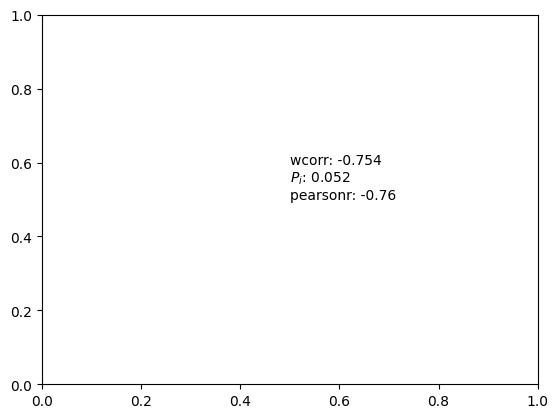

In [3]:
# Set a different font family
font = font_manager.FontProperties(family='DejaVu Sans')
at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction',
                         fontproperties=font)




In [ ]:
import matplotlib.pyplot as plt

# Set a system font (e.g., Arial)
plt.rcParams['font.family'] = 'Arial'

at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction')

In [ ]:
# font_prop = font_manager.FontProperties(family='DejaVu Sans',
#                               size=10,
#                             #   weight='bold',
#                             #   style='italic',
#                               )

'Source Serif Pro'
font_prop = font_manager.FontProperties(family='Source Sans Pro', # 'Source Code Pro'
                              size=10,
                            #   weight='bold',
                            #   style='italic',
                              )


at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction', fontproperties=font_prop)

In [ ]:
font_prop = font_manager.FontProperties(family='Source Serif Pro', # 'Source Code Pro'
                              size=10,
                            #   weight='bold',
                            #   style='italic',
                              )


at = plt.axes().annotate(test_test, xy=(0.5, 0.5), xycoords='axes fraction', fontproperties=font_prop)

In [ ]:
plt.rcParams['legend.title_fontsize']

In [ ]:
import colorsys
from neuropy.utils.mathutil import map_to_fixed_range, map_value


# def value_to_color(value):
#     """
#     Maps a value between -1.0 and 1.0 to an RGB color code.
#     """
#     norm = (value + 1) / 2  # Normalize the value to the range [0, 1]
#     rgb = colorsys.hsv_to_rgb(norm * 0.67, 1.0, 1.0)  # Convert to RGB
#     return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

def value_to_color(value, debug_print=True):
    """
    Maps a value between -1.0 and 1.0 to an RGB color code.
    -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
    """
    
    magnitude_value: float = np.abs(value)
    # norm_value: float = map_to_fixed_range(magnitude_value, x_min=0.0, x_max=1.0)
    saturation_component = magnitude_value
    # saturation_component = norm_value

    if value <= 0:
        # Map values from -1.0 to 0.0 to shades of blue
        # norm = (value + 1) / 2  # Normalize to [0, 1] range
        rgb = colorsys.hsv_to_rgb(0.67, saturation_component, magnitude_value)  # Blue to dark gray
    else:
        # Map values from 0.0 to 1.0 to shades of red
        # norm = value  # No need to normalize
        rgb = colorsys.hsv_to_rgb(0.0, saturation_component, magnitude_value)  # Dark gray to red

    if debug_print:
        print(f'value: {value}')
        # print(f'norm_value: {norm_value}')
        print(f'magnitude_value: {magnitude_value}')
        print(f'saturation_component: {saturation_component}')
        print(f'rgb: {rgb}')

    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

# def value_to_color(value):
#         """
#         Maps a value between -1.0 and 1.0 to an RGB color code.
#         -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
#         """
#         if value <= 0:
#             norm = (value + 1) / 2
#             rgb = colorsys.hsv_to_rgb(0.67, 1.0, 1.0 - norm)
#         else:
#             norm = value
#             rgb = colorsys.hsv_to_rgb(0.0, 1.0, 1.0 - norm)

#         return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))


In [ ]:

# def add_inner_title(ax, title, loc, value, strokewidth=3, stroke_foreground='w', stroke_alpha=0.9, font_size=None, text_alpha=1.0, **kwargs):
#     """
#     Add a figure title inside the border of the figure (instead of outside).
#     The title text color is determined by the provided float value between -1.0 and 1.0.
#     """
#     import matplotlib.pyplot as plt
#     from matplotlib.offsetbox import AnchoredText
#     from matplotlib.patheffects import withStroke

#     # Color mapping function
#     def value_to_color(value):
#         norm = (value + 1) / 2
#         rgb = colorsys.hsv_to_rgb(norm * 0.67, 1.0, 1.0)
#         return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

#     text_pop_key_name_list = ('horizontalalignment', 'verticalalignment', 'multialignment', 'rotation')
#     text_prop_kwargs = kwargs.pop('text_prop_kwargs', {})
#     text_prop_kwargs.update(
#         path_effects=[withStroke(foreground=stroke_foreground, linewidth=strokewidth, alpha=stroke_alpha)],
#         size=(font_size or plt.rcParams['legend.title_fontsize']),
#         color=value_to_color(value),  # Use the color mapping function
#         **{k: kwargs.pop(k) for k in text_pop_key_name_list if k in kwargs}
#     )

#     at = AnchoredText(title, loc=loc, prop=text_prop_kwargs, pad=0., borderpad=0.5, frameon=False, **kwargs)
#     ax.add_artist(at)

#     if text_alpha < 1.0:
#         at.txt._text.set_alpha(text_alpha)

#     return at


# Multi-color Labels _________________________________________________________________________________________________ #

import re
import matplotlib.font_manager as fm
from matplotlib.text import TextPath

def add_inner_title(ax, title, loc, strokewidth=3, stroke_foreground='w', stroke_alpha=0.9, font_size=None, text_alpha=1.0, **kwargs):
    """
    Add a figure title inside the border of the figure (instead of outside).
    The numeric values in the title text are color-coded based on their values between -1.0 and 1.0.
    The labels preceding the numeric values are rendered in dark gray.
    """
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke

    def value_to_color(value):
        """
        Maps a value between -1.0 and 1.0 to an RGB color code.
        -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
        """
        if value <= 0:
            norm = (value + 1) / 2
            rgb = colorsys.hsv_to_rgb(0.67, 1.0, 1.0 - norm)
        else:
            norm = value
            rgb = colorsys.hsv_to_rgb(0.0, 1.0, 1.0 - norm)

        return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

    text_pop_key_name_list = ('horizontalalignment', 'verticalalignment', 'multialignment', 'rotation')
    text_prop_kwargs = kwargs.pop('text_prop_kwargs', {})

    # Parse the input string and color-code the numeric values
    colored_text = []
    for part in re.split(r'([\d\.-]+)', title):
        if part.replace('.', '').replace('-', '').isdigit():
            value = float(part)
            color = value_to_color(value)
            font_prop = fm.FontProperties(color=color, **text_prop_kwargs.get('fontproperties', {}))
            colored_text.append(TextPath((0, 0), part, size=text_prop_kwargs.get('size', None), prop=font_prop))
        else:
            colored_text.append(part)

    text_prop_kwargs.update(
        path_effects=[withStroke(foreground=stroke_foreground, linewidth=strokewidth, alpha=stroke_alpha)],
        size=(font_size or plt.rcParams['legend.title_fontsize']),
        color='#404040',  # Dark gray color for labels
        **{k: kwargs.pop(k) for k in text_pop_key_name_list if k in kwargs}
    )

    at = AnchoredText(colored_text, loc=loc, prop=text_prop_kwargs, pad=0., borderpad=0.5, frameon=False, **kwargs)
    ax.add_artist(at)

    if text_alpha < 1.0:
        at.txt._text.set_alpha(text_alpha)

    return at

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
ax.set_title('Test Figure')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Add a color-coded title with a float value
float_value = -0.9
title_text = f"{float_value:.2f}"
add_inner_title(ax, title_text, loc=2, value=float_value)

plt.show()

In [ ]:
test_str = "wcorr: -0.754\n$P_i$: 0.052\npearsonr: -0.76"
add_inner_title(ax, test_str, loc=2)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 20
ax = plt.figure().add_subplot(xticks=[], yticks=[])

# The first word, created with text().
text = ax.text(.1, .5, "Matplotlib", color="red")
# Subsequent words, positioned with annotate(), relative to the preceding one.
text = ax.annotate(
    " says,", xycoords=text, xy=(1, 0), verticalalignment="bottom",
    color="gold", weight="bold")  # custom properties
text = ax.annotate(
    " hello", xycoords=text, xy=(1, 0), verticalalignment="bottom",
    color="green", style="italic")  # custom properties
text = ax.annotate(
    " world!", xycoords=text, xy=(1, 0), verticalalignment="bottom",
    color="blue", family="serif")  # custom properties

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

# Create a figure and axis
fig, ax = plt.subplots()

# Create text areas with different colors and properties
text1 = TextArea("This is ", textprops=dict(color="black"))
text2 = TextArea("colored ", textprops=dict(color="red", weight="bold"))
text3 = TextArea("text!", textprops=dict(color="blue"))

# Combine the text areas horizontally
box = HPacker(children=[text1, text2, text3], align="center", pad=0, sep=5)

# Create an anchored offset box
anchored_box = AnchoredOffsetbox(loc='upper left', child=box, pad=0., frameon=True,
                                 bbox_to_anchor=(0., 1.),
                                 bbox_transform=ax.transAxes, borderpad=0.)

# Add the offset box to the axes
ax.add_artist(anchored_box)

# Display the plot
plt.show()

In [4]:
from typing import Tuple
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
# from neuropy.utils.matplotlib_helpers import build_formatted_label_values_stack, build_formatted_label_values_stack, value_to_color
# ==================================================================================================================== #
# 2024-03-12 - Multi-color/multi-line labels                                                                           #
# ==================================================================================================================== #

def value_to_color(value, debug_print=True):
    """
    Maps a value between -1.0 and 1.0 to an RGB color code.
    -1.0 maps to bright blue, 0.0 maps to dark gray, and 1.0 maps to bright red.
    """
    import colorsys

    magnitude_value: float = np.abs(value)
    # norm_value: float = map_to_fixed_range(magnitude_value, x_min=0.0, x_max=1.0)
    saturation_component = magnitude_value
    # saturation_component = norm_value

    if value <= 0:
        # Map values from -1.0 to 0.0 to shades of blue
        # norm = (value + 1) / 2  # Normalize to [0, 1] range
        rgb = colorsys.hsv_to_rgb(0.67, saturation_component, magnitude_value)  # Blue to dark gray
    else:
        # Map values from 0.0 to 1.0 to shades of red
        # norm = value  # No need to normalize
        rgb = colorsys.hsv_to_rgb(0.0, saturation_component, magnitude_value)  # Dark gray to red

    if debug_print:
        print(f'value: {value}')
        # print(f'norm_value: {norm_value}')
        print(f'magnitude_value: {magnitude_value}')
        print(f'saturation_component: {saturation_component}')
        print(f'rgb: {rgb}')

    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255)) # ValueError: cannot convert float NaN to integer

def build_label_value_formatted_text_properties(label: str, value: float):
    """ Builds a single line of a_label: a_value text labels that can be formatted in different colors, sizes, etc. 
    Create text areas with different colors and properties

    from neuropy.utils.matplotlib_helpers import build_label_value_formatted_text_properties


    """
    # Create text areas with different colors and properties
    from matplotlib import font_manager

    label_text_props = dict(color="black")
    label_text_props['fontproperties'] = font_manager.FontProperties(family='Source Sans Pro', size=9)
    
    # assert not isinstance(value, str)
    value = float(value)
    color = value_to_color(value)
    value_textprops = dict(color=color, weight="bold")
    value_textprops['fontproperties'] = font_manager.FontProperties(family='Source Sans Pro', size=10)

    return label_text_props, value_textprops

def build_label_value_formatted_text(label: str, value: float):
    """ Builds a single line of a_label: a_value text labels that can be formatted in different colors, sizes, etc. 
    Create text areas with different colors and properties
    """
    # Create text areas with different colors and properties
    from matplotlib import font_manager
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    label_text_props, value_textprops = build_label_value_formatted_text_properties(label, value)

    (label, 

    ## Build actual labels:
    txtArea_label = TextArea(label, textprops=label_text_props)
    txtArea_formatted_value = TextArea(value, textprops=value_textprops)
    # Combine the text areas horizontally into a single line
    box = HPacker(children=[txtArea_label, txtArea_formatted_value], align="center", pad=0, sep=5)

    return box

def build_formatted_label_values_stack(formated_text_list):
    """ Builds a single line of a_label: a_value text labels that can be formatted in different colors, sizes, etc. 

    Usage:
        import matplotlib.pyplot as plt
        from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
        from neuropy.utils.matplotlib_helpers import build_formatted_label_values_stack, build_formatted_label_values_stack, value_to_color

        # Create a figure and axis
        fig, ax = plt.subplots()
        formated_text_list = [("wcorr: ", -0.754),
                                ("$P_i$: ", 0.052), 
                                ("pearsonr: ", -0.76),
                            ]

        stack_box = build_formatted_label_values_stack(formated_text_list)

        text_kwargs = _helper_build_text_kwargs_flat_top(a_curr_ax=ax)

        anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False,**text_kwargs, borderpad=0.)

        # Add the offset box to the axes
        ax.add_artist(anchored_box)

        # Display the plot
        plt.show()


    """
    # Create text areas with different colors and properties
    from matplotlib import font_manager
    from matplotlib.offsetbox import TextArea, HPacker, VPacker

    stack_box = VPacker(children=[build_label_value_formatted_text(a_label, a_value) for a_label, a_value in formated_text_list], align='right', pad=0, sep=2)
    return stack_box

    # anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False, **text_kwargs, borderpad=0.)


class AnchoredCustomText(AnchoredOffsetbox):
    """
    AnchoredOffsetbox with Text.

    
    Usage:
        from typing import Tuple
        import matplotlib.pyplot as plt
        from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
        from neuropy.utils.matplotlib_helpers import AnchoredCustomText, build_formatted_label_values_stack, build_formatted_label_values_stack, value_to_color
                                
        # Create a figure and axis
        fig, ax = plt.subplots()
        formated_text_list = [("wcorr: ", -0.754),
                                ("$P_i$: ", 0.052), 
                                ("pearsonr: ", -0.76),
                            ]

        text_kwargs = _helper_build_text_kwargs_flat_top(a_curr_ax=ax)

        anchored_custom_text = AnchoredCustomText(formated_text_list=formated_text_list, pad=0., frameon=False,**text_kwargs, borderpad=0.)
        # anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False,**text_kwargs, borderpad=0.)

        # Add the offset box to the axes
        ax.add_artist(anchored_custom_text)

        # Display the plot
        plt.show()
            
            
    """

    def __init__(self, formated_text_list, *, pad=0., borderpad=0., prop=None, **kwargs):
        """
        Parameters
        ----------
        s : str
            Text.

        loc : str
            Location code. See `AnchoredOffsetbox`.

        pad : float, default: 0.4
            Padding around the text as fraction of the fontsize.

        borderpad : float, default: 0.5
            Spacing between the offsetbox frame and the *bbox_to_anchor*.

        prop : dict, optional
            Dictionary of keyword parameters to be passed to the
            `~matplotlib.text.Text` instance contained inside AnchoredText.

        **kwargs
            All other parameters are passed to `AnchoredOffsetbox`.
        """
        if prop is None:
            prop = {}
        badkwargs = {'va', 'verticalalignment'}
        if badkwargs & set(prop):
            raise ValueError(
                'Mixing verticalalignment with AnchoredText is not supported.')

        # self.txtAreaItems = []
        self.stack_box = build_formatted_label_values_stack(formated_text_list)

        # self.txt = TextArea(s, textprops=prop)
        # fp = self.txt._text.get_fontproperties()
        super().__init__(child=self.stack_box, pad=pad, borderpad=borderpad, prop=prop, **kwargs)


    def update_text(self, formated_text_list):
        raise NotImplementedError




def _helper_build_text_kwargs_flat_top(a_curr_ax):
    """ captures nothing. """
    # Get the axes bounding box in figure coordinates
    a_fig = a_curr_ax.get_figure()
    bbox = a_curr_ax.get_position()
    half_x_margin_width = (1.0 - bbox.width) / 2.0
    half_y_margin_width = (1.0 - bbox.ymax) / 2.0
    bbox_offset_magnitude: Tuple[float,float] = (half_x_margin_width, half_y_margin_width)

    # TEXT FORMATTING AND POSITIONING KWARGS _____________________________________________________________________________ #
    # text_kwargs = dict(loc='upper center', stroke_alpha=0.35, strokewidth=5, stroke_foreground='k', text_foreground=f'{cls.text_color}', font_size=13, text_alpha=0.8)
    # text_kwargs = dict(loc='upper left', stroke_alpha=0.35, strokewidth=4, stroke_foreground='k', text_foreground=f'{cls.text_color}', font_size=11, text_alpha=0.7)
    # text_kwargs = dict(stroke_alpha=0.8, strokewidth=4, stroke_foreground='k', text_foreground=f'{cls.text_color}', font_size=10, text_alpha=0.75)
    # text_kwargs = dict(stroke_alpha=0.8, strokewidth=5, stroke_foreground='w', text_foreground=f'#013220', font_size=11, text_alpha=0.75)

    # font_prop = font_manager.FontProperties(family='Source Sans Pro', # 'Source Code Pro'
    #                     #   size=10,
    #                     weight='bold',
    #                     #   style='italic',
    #                     )
    # text_kwargs['fontproperties'] = font_prop
    text_kwargs = {}

    ## Positioning kwargs:
    text_kwargs |= dict(loc='upper right',
                            # horizontalalignment='center', ## DOES NOTHING?
                            #verticalalignment='center', ## BREAKS IT
                            # multialignment='r', ## BREAKS IT
                            # horizontalalignment='right',  
                            # rotation=-45, #transform=a_curr_ax.transAxes,
                            bbox_to_anchor=((1.0 + bbox_offset_magnitude[0]), (1.0 + bbox_offset_magnitude[1])), bbox_transform=a_curr_ax.transAxes, transform=a_fig.transFigure,
                            # bbox_to_anchor=((1.0 + bbox_offset_magnitude), (1.0 + bbox_offset_magnitude)), bbox_transform=a_curr_ax.transAxes,                        
                            ) # oriented in upper-right corner, at a diagonal angle

    return text_kwargs


# Create a figure and axis
fig, ax = plt.subplots()
formated_text_list = [("wcorr: ", -0.754),
                        ("$P_i$: ", 0.052), 
                        ("pearsonr: ", -0.76),
                    ]

stack_box = build_formatted_label_values_stack(formated_text_list)

text_kwargs = _helper_build_text_kwargs_flat_top(a_curr_ax=ax)

anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False,**text_kwargs, borderpad=0.)

# Add the offset box to the axes
ax.add_artist(anchored_box)

# Display the plot
plt.show()

ImportError: cannot import name 'build_or_reuse_figure' from partially initialized module 'neuropy.utils.matplotlib_helpers' (most likely due to a circular import) (C:\Users\pho\repos\Spike3DWorkEnv\NeuroPy\neuropy\utils\matplotlib_helpers.py)

In [3]:
from typing import Tuple
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
from neuropy.utils.matplotlib_helpers import build_formatted_label_values_stack, build_formatted_label_values_stack, value_to_color


class AnchoredCustomText(AnchoredOffsetbox):
    """
    AnchoredOffsetbox with Text.
    """

    def __init__(self, formated_text_list, *, pad=0., borderpad=0., prop=None, **kwargs):
        """
        Parameters
        ----------
        s : str
            Text.

        loc : str
            Location code. See `AnchoredOffsetbox`.

        pad : float, default: 0.4
            Padding around the text as fraction of the fontsize.

        borderpad : float, default: 0.5
            Spacing between the offsetbox frame and the *bbox_to_anchor*.

        prop : dict, optional
            Dictionary of keyword parameters to be passed to the
            `~matplotlib.text.Text` instance contained inside AnchoredText.

        **kwargs
            All other parameters are passed to `AnchoredOffsetbox`.
        """
        if prop is None:
            prop = {}
        badkwargs = {'va', 'verticalalignment'}
        if badkwargs & set(prop):
            raise ValueError(
                'Mixing verticalalignment with AnchoredText is not supported.')

        # self.txtAreaItems = []
        self.stack_box = build_formatted_label_values_stack(formated_text_list)

        # self.txt = TextArea(s, textprops=prop)
        # fp = self.txt._text.get_fontproperties()
        super().__init__(child=self.stack_box, pad=pad, borderpad=borderpad, prop=prop, **kwargs)


    def update_text(self, formated_text_list):
        
        raise NotImplementedError
    


# Create a figure and axis
fig, ax = plt.subplots()
formated_text_list = [("wcorr: ", -0.754),
                        ("$P_i$: ", 0.052), 
                        ("pearsonr: ", -0.76),
                    ]

text_kwargs = _helper_build_text_kwargs_flat_top(a_curr_ax=ax)

anchored_custom_text = AnchoredCustomText(formated_text_list=formated_text_list, pad=0., frameon=False,**text_kwargs, borderpad=0.)
# anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False,**text_kwargs, borderpad=0.)

# Add the offset box to the axes
ax.add_artist(anchored_custom_text)

# Display the plot
plt.show()

ImportError: cannot import name 'build_or_reuse_figure' from partially initialized module 'neuropy.utils.matplotlib_helpers' (most likely due to a circular import) (C:\Users\pho\repos\Spike3DWorkEnv\NeuroPy\neuropy\utils\matplotlib_helpers.py)

In [12]:
anchored_custom_text.findobj(match=None, include_self=False)

[Text(0, 0, 'wcorr: '),
 Text(0, 0, '-0.754'),
 Text(0, 0, '$P_i$: '),
 Text(0, 0, '0.052'),
 Text(0, 0, 'pearsonr: '),
 Text(0, 0, '-0.76'),

In [2]:
formatted_row_objs = anchored_custom_text.stack_box.get_children()
formatted_row_objs

NameError: name 'anchored_custom_text' is not defined

In [ ]:
label_textArea, value_textArea = formatted_row_objs[0].get_children() # matplotlib.offsetbox.TextArea
value_textArea.get_text()

In [1]:
# Create a figure and axis
fig, ax = plt.subplots()


sweep_values = np.linspace(start=-1.0, stop=1.0, num=25)
formated_text_list = [("val: ", v) for v in sweep_values]
stack_box = VPacker(children=[build_label_value_formatted_text(a_label, a_value) for a_label, a_value in formated_text_list], align='right', pad=0, sep=2)

text_kwargs = _helper_build_text_kwargs_flat_top(a_curr_ax=ax)
anchored_box = AnchoredOffsetbox(child=stack_box, pad=0., frameon=False, **text_kwargs, borderpad=0.)

# Add the offset box to the axes
ax.add_artist(anchored_box)

# Display the plot
plt.show()

NameError: name 'plt' is not defined